Simulate the predator-prey equations below (these are a more realistic version of the Lokta-Volterra equations)
$$
\frac{dx}{dt} = x(1-x) - \frac{axy}{d+x} \\
\frac{dy}{dt} = by(1 - \frac{y}{x})
$$
for a=1, d=0.1, and b∈[0.1,0.5]

1.1 What behaviour do you see in the long-time limit?

    1.1.1 What happens for b > 0.26?

    1.1.2 What happens for b < 0.26?

1.2 Isolate a periodic orbit. What are its starting conditions? What is its period?

1.3 This will provide testing data for your numerical methods.



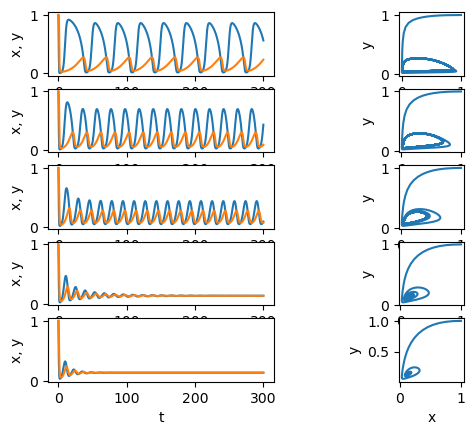

In [6]:
# Numerical shooting worksheet: Evolutionary prototyping
import numpy as np
import matplotlib.pyplot as plt

from Helpers.solvers import solve_to

# Define ODE
def fun(t, y, a=1, d=0.1, b=0.1):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])

t0 = 0
y0 = np.array([1, 1])
t_max = 300
deltat_max = 0.1

# Solve ODE
timeSeries = []
b_args = [0.1, 0.2, 0.3, 0.4, 0.5]
for b in b_args:
    timeSeries.append(solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1.5, 0.1, b)))

# Plot results: subplot for each b
fig, axs = plt.subplots(len(b_args), 2)

for i, b in enumerate(b_args):
    # Plot x(t), y(t) on the left. Plot dy/dx on the right.
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 0], label='b = {} \nx(t)'.format(b))
    axs[i, 0].plot(timeSeries[i][0], timeSeries[i][1][:, 1], label='y(t)')
    axs[i, 0].set_xlabel('t')
    axs[i, 0].set_ylabel('x, y')

    axs[i, 1].plot(timeSeries[i][1][:, 0], timeSeries[i][1][:, 1], label='b = {} \ndy/dx'.format(b))
    axs[i, 1].set_aspect('equal')
    axs[i, 1].set_xlabel('x')
    axs[i, 1].set_ylabel('y')
plt.show()

In long term, a stable periodic orbit is formed if b<0.26. If b>0.26, the system will converge to fixed population sizes.

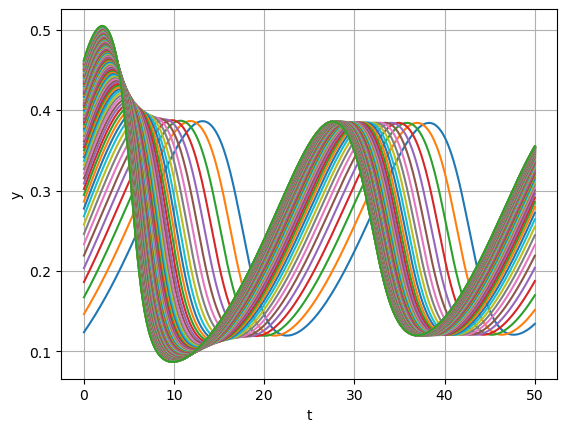

In [45]:
# Define ODE
def fun(t, y, a=1, d=0.1, b=0.15):
    x = y[0]
    y = y[1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), b*y*(1 - y/x)])

t0 = 0
v0 = 0.1
step = 0.1
y_target = 0.36

# Initial guess
y0 = np.array([1, v0])
deltat_max = 0.1
t_max = 50

# Periodic orbit: b = 0.15
t, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1, 0.1, 0.15))
x, y = y_[:, 0], y_[:, 1]

while np.round(y[-1], 2) != y_target:
    # Adjust v0 proportional to the difference between the target and the current value
    v0 += step * (y_target - y[-1])
    y0 = np.array([1, v0])
    t, y_ = solve_to(fun, t0, y0, t_max=t_max, method='RK4', deltat_max=deltat_max, args=(1, 0.1, 0.15))
    x, y = y_[:, 0], y_[:, 1]


    plt.plot(t, y, label='v0 = {}'.format(v0))

plt.xlabel('t')
plt.ylabel('y')
plt.grid()
# plt.legend()

plt.show()